# 🧠 LAB1 – Raport z eksperymentów (FFNN i SOM)
---
## Instrukcja
- Uzupełnijcie notebook krok po kroku.
- Każdy eksperyment powinien zawierać opis danych, konfigurację sieci, wyniki i komentarz.
- **Łącznie: 4 eksperymenty (2 zbiory × FFNN i SOM).**
- Jeśli zbiór jest mały → zastosujcie **k-fold cross-validation (np. k=5)**.
- Raport zakończcie podsumowaniem i porównaniem FFNN vs SOM.


## 🔹 Eksperyment 1 – Zbiór A + FFNN
### Opis zbioru danych
- liczba próbek, liczba cech, klasy
- trudności / balans klas


In [23]:
# TODO: Załaduj zbiór danych A
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('SPECT.train', header=None)
test_df = pd.read_csv('SPECT.test', header=None)

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nFirst few rows:\n{train_df.head()}")

spect_df = pd.concat([train_df, test_df], ignore_index=True)

print(f"\nCombined data shape: {spect_df.shape}")

Training data shape: (80, 23)
Test data shape: (187, 23)

First few rows:
   0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   1   0   0   0   1   0   0   0   1   1  ...   1   1   0   0   0   0   0   
1   1   0   0   1   1   0   0   0   1   1  ...   1   1   0   0   0   0   0   
2   1   1   0   1   0   1   0   0   1   0  ...   1   0   0   0   0   0   0   
3   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   1   0   0   0   0   0   0   0   1   0  ...   1   0   1   1   0   0   0   

   20  21  22  
0   0   0   0  
1   0   0   1  
2   0   0   0  
3   1   1   1  
4   0   0   0  

[5 rows x 23 columns]

Combined data shape: (267, 23)


In [24]:
# TODO: Podziel dane na train/val/test lub zastosuj k-fold cross-validation

X = spect_df.iloc[:, 1:].values
y = spect_df.iloc[:, 0].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




In [25]:
# TODO: Zbuduj i wytrenuj sieć FFNN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Input layer + First hidden layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    layers.Dense(32, activation='relu'),

    # Output layer
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


C:\Users\galek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7742 - loss: 0.5692 - val_accuracy: 0.7500 - val_loss: 0.5113
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7957 - loss: 0.4829 - val_accuracy: 0.7500 - val_loss: 0.4617
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7957 - loss: 0.4311 - val_accuracy: 0.7500 - val_loss: 0.4382
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7957 - loss: 0.4074 - val_accuracy: 0.7500 - val_loss: 0.4309
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.3892 - val_accuracy: 0.7500 - val_loss: 0.4321
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.3828 - val_accuracy: 0.7500 - val_loss: 0.4354
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7957 - loss: 0.3773 - val_accuracy: 0.7500 - val_loss: 0.4367
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.3736 - val_accuracy: 0.7500 - val_loss: 0.4374
Epoch 9/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

EVALUATION ON TEST SET
Test set size: 41 samples

Confusion Matrix:
[[ 4  3]
 [ 2 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.93        34

    accuracy                           0.88        41
   macro avg       0.79      0.76      0.77        41
weighted avg       0.87      0.88      0.87        41



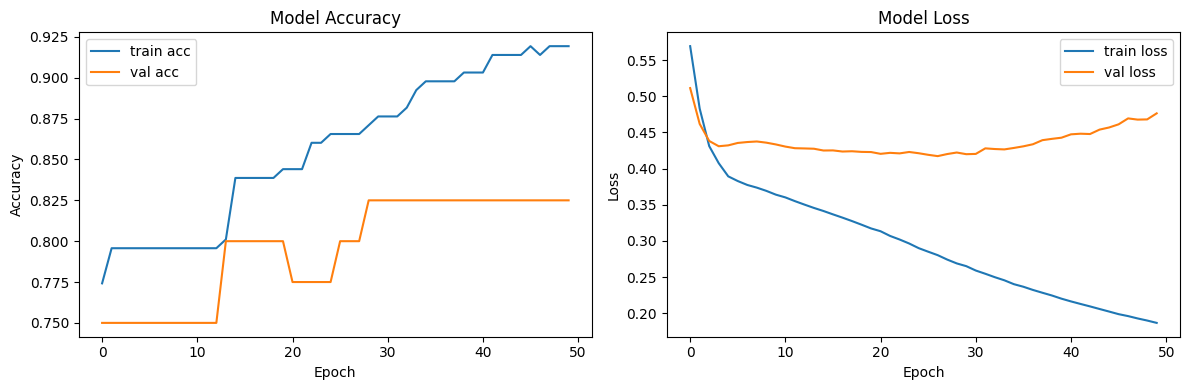

In [26]:
# TODO: Ewaluacja FFNN
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)

print("\n" + "="*50)
print("EVALUATION ON TEST SET")
print("="*50)
print(f"Test set size: {len(y_test)} samples")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### Komentarz do wyników
- Czy sieć dobrze klasyfikuje dane?
- Jak wygląda macierz pomyłek?
- Czy pojawiło się overfitting / underfitting?


## 🔹 Eksperyment 2 – Zbiór A + SOM
### Opis zbioru danych
- liczba próbek, liczba cech, klasy
- trudności / balans klas


In [27]:
import numpy as np
from minisom import MiniSom

N = X_train.shape[0]
input_len = X_train.shape[1]

total_neurons = int(5 * np.sqrt(N))
som_dim_heuristic = int(np.sqrt(total_neurons))

learning_rates = [0.1, 0.5, 0.9]
som_dims_to_test = [(som_dim_heuristic, som_dim_heuristic), (10, 10), (20, 20)]
epoches = 150

soms = []
print(f"Training {len(learning_rates) * len(som_dims_to_test)} SOM models with different parameters...")

for lr in learning_rates:
    for som_x, som_y in som_dims_to_test:
        print(f"\nInitializing SOM with dimensions ({som_x}, {som_y}) and Learning Rate: {lr}")
        som = MiniSom(x=som_x, y=som_y, input_len=input_len, sigma=1.0, learning_rate=lr, random_seed=42)
        som.random_weights_init(X_train)
        print(f"  Training for {epoches * len(X_train)} iterations...")
        som.train_random(X_train, epoches * len(X_train))
        soms.append({'model': som, 'lr': lr, 'dim': (som_x, som_y)})


Training 9 SOM models with different parameters...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.1
  Training for 27900 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.1
  Training for 27900 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.1
  Training for 27900 iterations...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.5
  Training for 27900 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.5
  Training for 27900 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.5
  Training for 27900 iterations...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.9
  Training for 27900 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.9
  Training for 27900 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.9
  Training for 27900 iterations...


In [28]:
for som_info in soms:
    current_som = som_info['model']
    lr = som_info['lr']
    som_x, som_y = som_info['dim']
    quantization_error = current_som.quantization_error(X_train)
    topographic_error = current_som.topographic_error(X_train)
    print(f"SOM with Learning Rate: {lr}, Dimensions: ({som_x}, {som_y})")
    print(f"  Quantization Error: {quantization_error}")
    print(f"  Topographic Error: {topographic_error}")


SOM with Learning Rate: 0.1, Dimensions: (8, 8)
  Quantization Error: 0.8448920977837979
  Topographic Error: 0.25806451612903225
SOM with Learning Rate: 0.1, Dimensions: (10, 10)
  Quantization Error: 0.6434958197152989
  Topographic Error: 0.22043010752688172
SOM with Learning Rate: 0.1, Dimensions: (20, 20)
  Quantization Error: 0.08106104427520168
  Topographic Error: 0.08064516129032258
SOM with Learning Rate: 0.5, Dimensions: (8, 8)
  Quantization Error: 0.7974241195098475
  Topographic Error: 0.41935483870967744
SOM with Learning Rate: 0.5, Dimensions: (10, 10)
  Quantization Error: 0.47912719080363847
  Topographic Error: 0.20430107526881722
SOM with Learning Rate: 0.5, Dimensions: (20, 20)
  Quantization Error: 0.01688819973901915
  Topographic Error: 0.026881720430107527
SOM with Learning Rate: 0.9, Dimensions: (8, 8)
  Quantization Error: 0.8333017805850724
  Topographic Error: 0.3924731182795699
SOM with Learning Rate: 0.9, Dimensions: (10, 10)
  Quantization Error: 0.48086

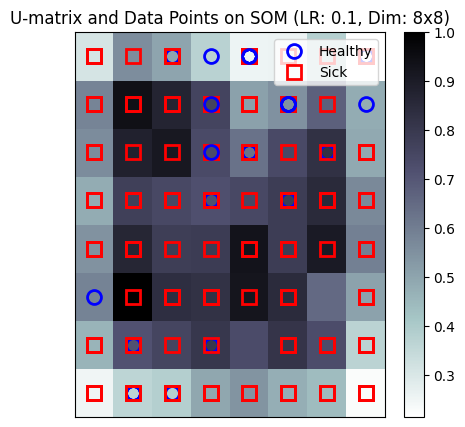

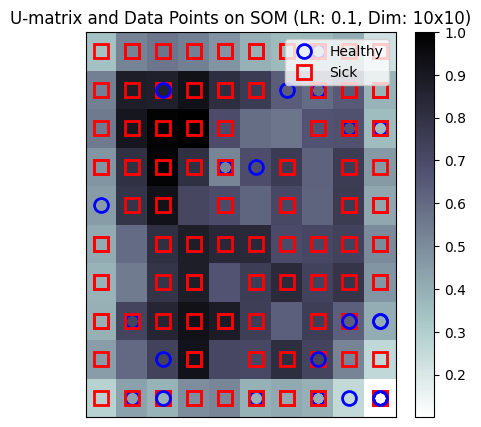

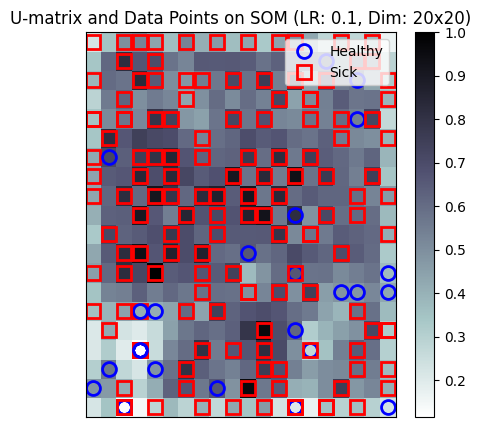

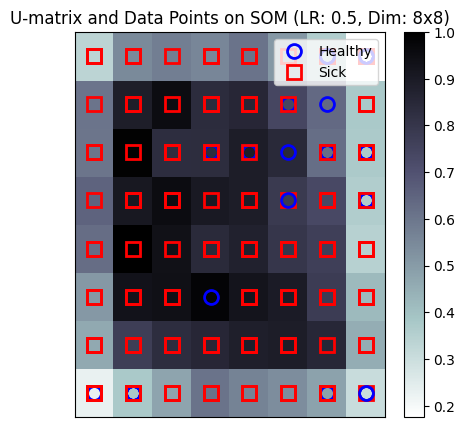

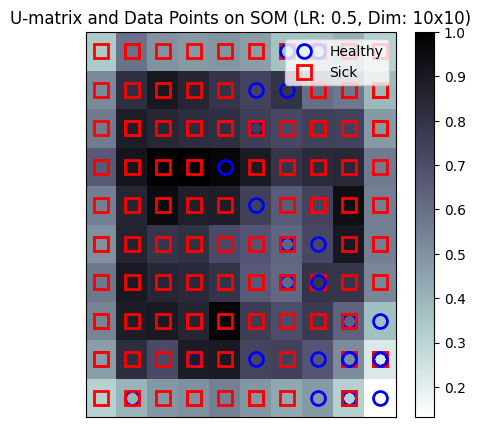

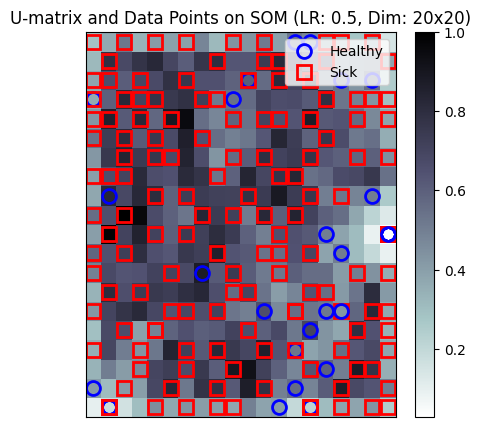

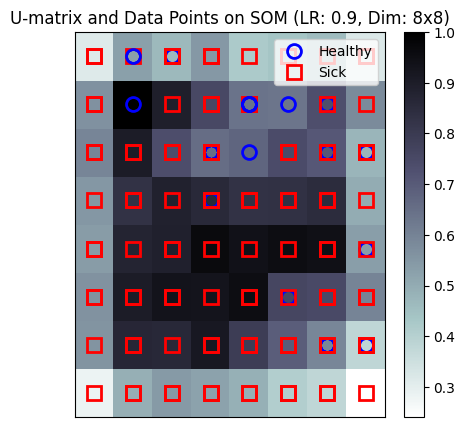

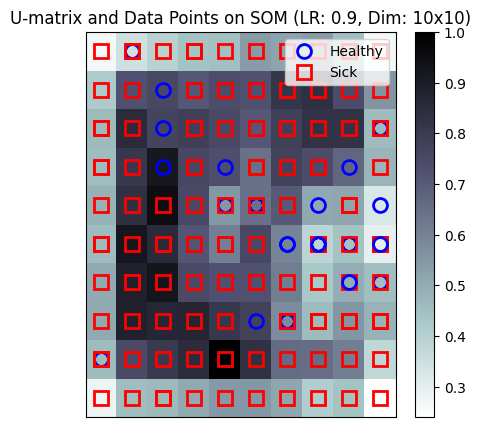

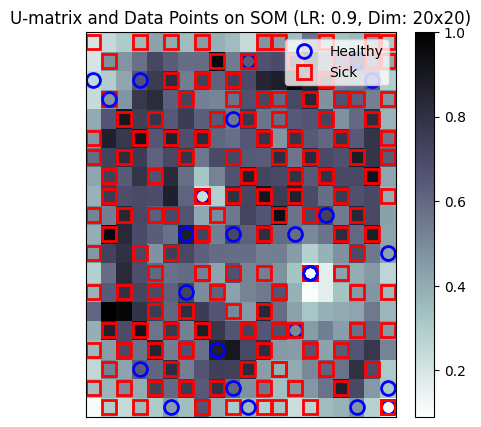

In [29]:
import matplotlib.pyplot as plt
import numpy as np

for som_info in soms:
    current_som = som_info['model']
    lr = som_info['lr']
    som_x, som_y = som_info['dim']

    current_u_matrix = current_som.distance_map().T

    plt.figure(figsize=(5, 5))
    plt.pcolor(current_u_matrix, cmap='bone_r')
    plt.colorbar()

    for j, x in enumerate(X_train):
        w = current_som.winner(x)

        # Class 0 (healthy) = blue circles
        # Class 1 (sick) = red squares
        if y_train[j] == 0:
            color = 'blue'
            marker = 'o'
            label = 'Healthy' if j == 0 else ''  # Label only once for legend
        else:
            color = 'red'
            marker = 's'  # square
            label = 'Sick' if y_train[j] == 1 and j == list(y_train).index(1) else ''

        plt.plot(w[0] + 0.5, w[1] + 0.5, marker,
                 markerfacecolor='None',
                 markeredgecolor=color,
                 markersize=10,
                 markeredgewidth=2,
                 label=label)

    plt.legend(loc='upper right')
    plt.title(f'U-matrix and Data Points on SOM (LR: {lr}, Dim: {som_x}x{som_y})')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### Komentarz do wyników
- Czy klasy są dobrze rozdzielone na mapie?
- Jakie są wartości błędów kwantyzacji i topograficznego?
- Czy SOM pokazuje coś, czego FFNN nie uchwycił?


## 🔹 Eksperyment 3 – Zbiór B (analogicznie)


In [30]:
# Załaduj zbiór danych B

statlog_df = pd.read_csv('heart.dat', header=None, sep=r'\s+')

print(f"Statlog data shape: {statlog_df.shape}")
print(f"\nFirst few rows:\n{statlog_df.head()}")


Statlog data shape: (270, 14)

First few rows:
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  70.0  1.0  4.0  130.0  322.0  0.0  2.0  109.0  0.0  2.4  2.0  3.0  3.0   2
1  67.0  0.0  3.0  115.0  564.0  0.0  2.0  160.0  0.0  1.6  2.0  0.0  7.0   1
2  57.0  1.0  2.0  124.0  261.0  0.0  0.0  141.0  0.0  0.3  1.0  0.0  7.0   2
3  64.0  1.0  4.0  128.0  263.0  0.0  0.0  105.0  1.0  0.2  2.0  1.0  7.0   1
4  74.0  0.0  2.0  120.0  269.0  0.0  2.0  121.0  1.0  0.2  1.0  1.0  3.0   1


In [31]:
# Podziel dane na train/val/test lub zastosuj k-fold cross-validation

X = statlog_df.iloc[:, :-1].values
y = statlog_df.iloc[:, -1].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

y_train = y_train - 1
y_val = y_val - 1
y_test = y_test - 1


In [32]:
# Zbuduj i wytrenuj sieć FFNN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Input layer + First hidden layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    layers.Dense(32, activation='relu'),

    # Output layer
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


C:\Users\galek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4286 - loss: 9.0154 - val_accuracy: 0.5500 - val_loss: 2.4662
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5556 - loss: 3.6564 - val_accuracy: 0.5500 - val_loss: 2.6185
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5185 - loss: 1.6107 - val_accuracy: 0.4500 - val_loss: 1.7768
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5503 - loss: 1.0610 - val_accuracy: 0.5500 - val_loss: 1.1567
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5820 - loss: 0.9067 - val_accuracy: 0.6000 - val_loss: 0.7161
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6243 - loss: 0.7196 - val_accuracy: 0.7500 - val_loss: 0.6658
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6243 - loss: 0.6829 - val_accuracy: 0.7500 - val_loss: 0.5311
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6825 - loss: 0.5799 - val_accuracy: 0.7500 - val_loss: 0.5396
Epoch 9/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

EVALUATION ON TEST SET
Test set size: 41 samples

Confusion Matrix:
[[13 10]
 [ 1 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.70        23
           1       0.63      0.94      0.76        18

    accuracy                           0.73        41
   macro avg       0.78      0.75      0.73        41
weighted avg       0.80      0.73      0.73        41



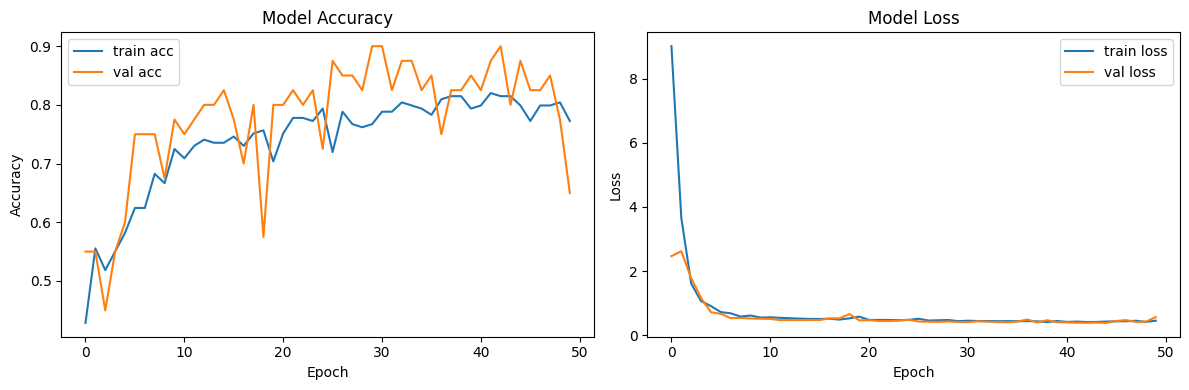

In [33]:
# Ewaluacja FFNN
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)

print("\n" + "="*50)
print("EVALUATION ON TEST SET")
print("="*50)
print(f"Test set size: {len(y_test)} samples")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## 🔹 Eksperyment 4 – Zbiór B + SOM,
### Opis zbioru danych,
   - Heart disease dataset z nieciągłymi (mixed type) cechami,
   - 270 próbek, 13 cech (real, ordered, binary, nominal),
   - 2 klasy: absence (0) vs presence (1) of heart disease

In [34]:
# Normalize the data for SOM (since features are not binary and have different scales)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"Feature statistics after scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0)[:5]} ...")
print(f"Std: {X_train_scaled.std(axis=0)[:5]} ...")

X_train_scaled shape: (189, 13)
Feature statistics after scaling:
Mean: [ 3.24843033e-16  4.11193713e-17 -1.05735526e-17  5.15166980e-16
 -1.10434883e-16] ...
Std: [1. 1. 1. 1. 1.] ...


In [35]:
# Train SOM models with different hyperparameters for Heart dataset
import numpy as np
from minisom import MiniSom

N = X_train_scaled.shape[0]
input_len = X_train_scaled.shape[1]

total_neurons = int(5 * np.sqrt(N))
som_dim_heuristic = int(np.sqrt(total_neurons))

learning_rates = [0.1, 0.5, 0.9]
som_dims_to_test = [(som_dim_heuristic, som_dim_heuristic), (10, 10), (20, 20)]
epochs = 150

soms_heart = []
print(f"Training {len(learning_rates) * len(som_dims_to_test)} SOM models for Heart dataset...")

for lr in learning_rates:
    for som_x, som_y in som_dims_to_test:
        print(f"\nInitializing SOM with dimensions ({som_x}, {som_y}) and Learning Rate: {lr}")
        som = MiniSom(x=som_x, y=som_y, input_len=input_len, sigma=1.0, learning_rate=lr, random_seed=42)
        som.random_weights_init(X_train_scaled)
        print(f"  Training for {epochs * len(X_train_scaled)} iterations...")
        som.train_random(X_train_scaled, epochs * len(X_train_scaled))
        soms_heart.append({'model': som, 'lr': lr, 'dim': (som_x, som_y)})

print("\nTraining complete!")

Training 9 SOM models for Heart dataset...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.1
  Training for 28350 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.1
  Training for 28350 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.1
  Training for 28350 iterations...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.5
  Training for 28350 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.5
  Training for 28350 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.5
  Training for 28350 iterations...

Initializing SOM with dimensions (8, 8) and Learning Rate: 0.9
  Training for 28350 iterations...

Initializing SOM with dimensions (10, 10) and Learning Rate: 0.9
  Training for 28350 iterations...

Initializing SOM with dimensions (20, 20) and Learning Rate: 0.9
  Training for 28350 iterations...

Training complete!


In [36]:
# Calculate and display quantization and topographic errors for Heart dataset SOMs
for som_info in soms_heart:
    current_som = som_info['model']
    lr = som_info['lr']
    som_x, som_y = som_info['dim']
    quantization_error = current_som.quantization_error(X_train_scaled)
    topographic_error = current_som.topographic_error(X_train_scaled)
    print(f"SOM with Learning Rate: {lr}, Dimensions: ({som_x}, {som_y})")
    print(f"  Quantization Error: {quantization_error:.4f}")
    print(f"  Topographic Error: {topographic_error:.4f}")
    print()

SOM with Learning Rate: 0.1, Dimensions: (8, 8)
  Quantization Error: 1.5535
  Topographic Error: 0.3757

SOM with Learning Rate: 0.1, Dimensions: (10, 10)
  Quantization Error: 1.2196
  Topographic Error: 0.2275

SOM with Learning Rate: 0.1, Dimensions: (20, 20)
  Quantization Error: 0.2544
  Topographic Error: 0.1270

SOM with Learning Rate: 0.5, Dimensions: (8, 8)
  Quantization Error: 1.4897
  Topographic Error: 0.2804

SOM with Learning Rate: 0.5, Dimensions: (10, 10)
  Quantization Error: 1.0381
  Topographic Error: 0.4074

SOM with Learning Rate: 0.5, Dimensions: (20, 20)
  Quantization Error: 0.0561
  Topographic Error: 0.0317

SOM with Learning Rate: 0.9, Dimensions: (8, 8)
  Quantization Error: 1.4938
  Topographic Error: 0.4127

SOM with Learning Rate: 0.9, Dimensions: (10, 10)
  Quantization Error: 0.9666
  Topographic Error: 0.4286

SOM with Learning Rate: 0.9, Dimensions: (20, 20)
  Quantization Error: 0.0291
  Topographic Error: 0.0370



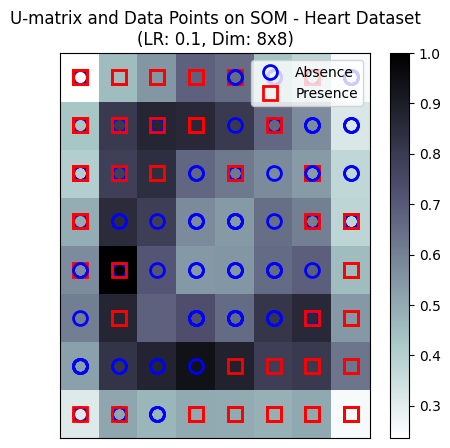

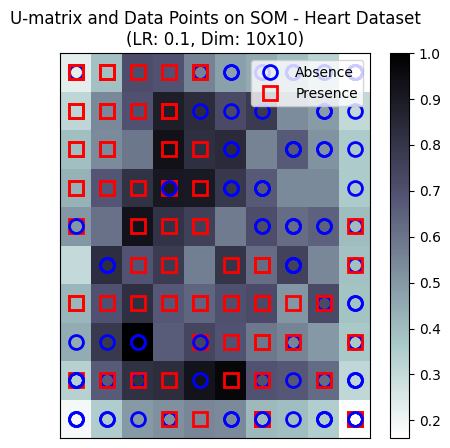

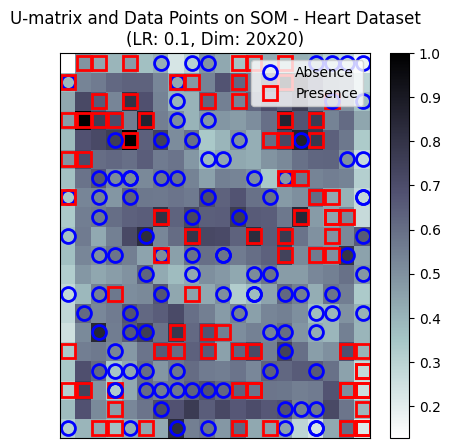

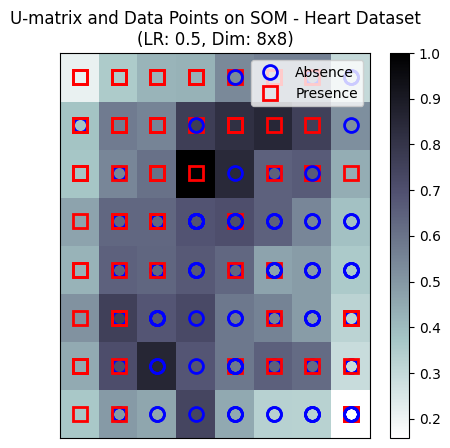

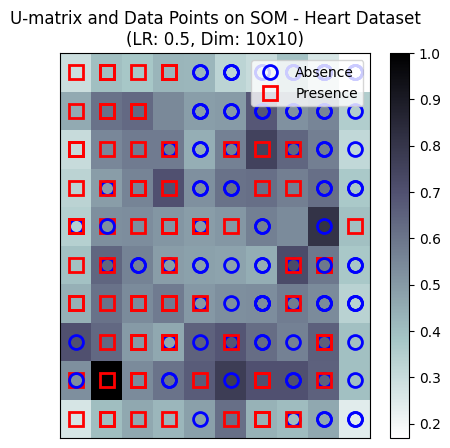

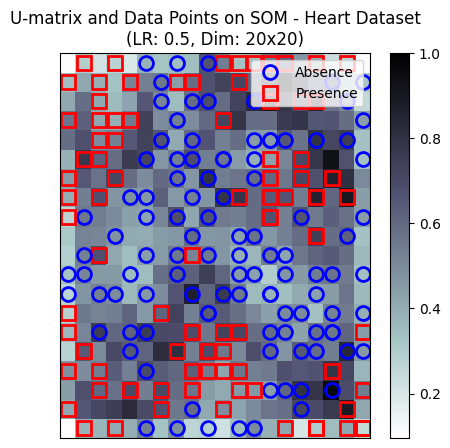

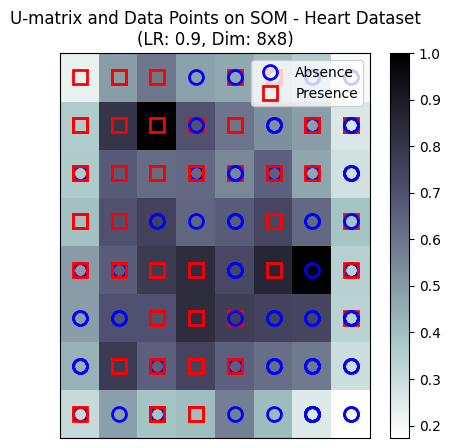

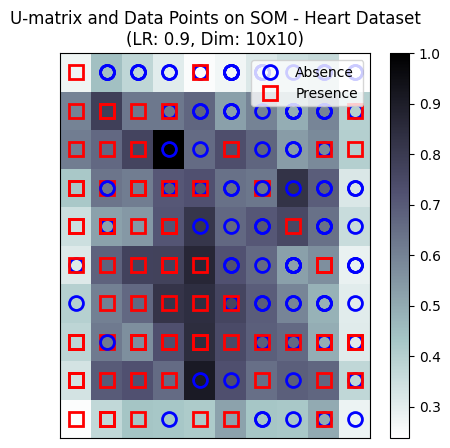

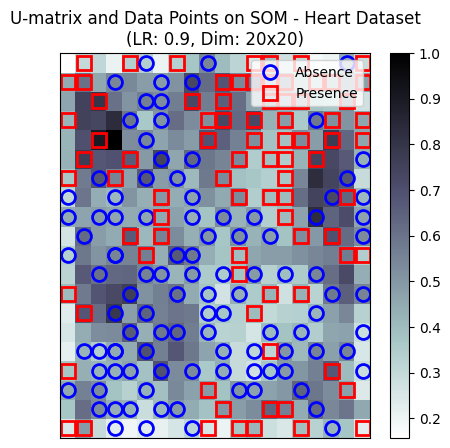

In [37]:
# Visualize U-matrices with data points for Heart dataset
import matplotlib.pyplot as plt
import numpy as np

for som_info in soms_heart:
    current_som = som_info['model']
    lr = som_info['lr']
    som_x, som_y = som_info['dim']

    current_u_matrix = current_som.distance_map().T

    plt.figure(figsize=(5, 5))
    plt.pcolor(current_u_matrix, cmap='bone_r')
    plt.colorbar()

    for j, x in enumerate(X_train_scaled):
        w = current_som.winner(x)

        # Class 0 (absence) = blue circles
        # Class 1 (presence) = red squares
        if y_train[j] == 0:
            color = 'blue'
            marker = 'o'
            label = 'Absence' if j == 0 else ''  # Label only once for legend
        else:
            color = 'red'
            marker = 's'  # square
            label = 'Presence' if y_train[j] == 1 and j == list(y_train).index(1) else ''

        plt.plot(w[0] + 0.5, w[1] + 0.5, marker,
                 markerfacecolor='None',
                 markeredgecolor=color,
                 markersize=10,
                 markeredgewidth=2,
                 label=label)

    plt.legend(loc='upper right')
    plt.title(f'U-matrix and Data Points on SOM - Heart Dataset\n(LR: {lr}, Dim: {som_x}x{som_y})')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 🔹 Podsumowanie
- Porównanie FFNN i SOM dla obu zbiorów.
- W jakich przypadkach FFNN działa lepiej, a w jakich SOM?
- Refleksja: co było najtrudniejsze, czego się nauczyliście.
